# Data Preprocessing

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the dataset

In [3]:
data=pd.read_csv(r"D:\ICT\diamonds_new (1).csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [5]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [6]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [7]:
data.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


# Handling Missing Values

In [8]:
data.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [9]:
#Draw histogram

(array([2.5155e+04, 1.8527e+04, 7.1290e+03, 2.3490e+03, 6.1400e+02,
        5.3000e+01, 6.0000e+00, 5.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([0.2  , 0.681, 1.162, 1.643, 2.124, 2.605, 3.086, 3.567, 4.048,
        4.529, 5.01 ]),
 <BarContainer object of 10 artists>)

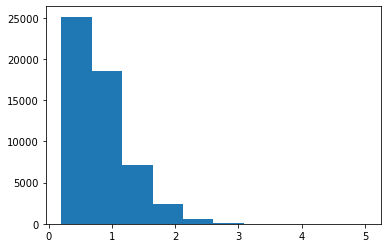

In [10]:
plt.hist(data['carat'])

In [11]:
median_carat=data['carat'].median()

In [12]:
#fill missing values with median in carat col

In [13]:
data['carat']=data['carat'].fillna(median_carat)

In [14]:
data.isna().sum()

carat         0
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

(array([2.0000e+00, 6.5700e+02, 3.7491e+04, 1.5138e+04, 5.6300e+02,
        2.3000e+01, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([43. , 48.2, 53.4, 58.6, 63.8, 69. , 74.2, 79.4, 84.6, 89.8, 95. ]),
 <BarContainer object of 10 artists>)

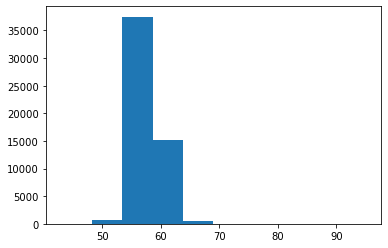

In [15]:
plt.hist(data['table'])

In [16]:
median_table=data['table'].median()

In [17]:
#fill missing values with median in carat col

In [18]:
data['table']=data['table'].fillna(median_table)

In [19]:
data.isna().sum()

carat         0
cut           0
color        56
clarity       0
table         0
x             0
y             0
z             0
price_new     0
dtype: int64

In [20]:
#filling missing values in column 'color' with mode since it is categorical

In [21]:
data['color'].value_counts()

G    11236
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [22]:
data['color']=data['color'].fillna("G")

In [23]:
data.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

In [24]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

# Outlier Detection

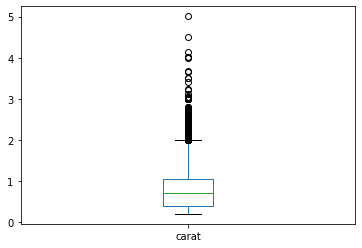

In [25]:
data['carat'].plot(kind="box")
plt.show()

In [26]:
data['carat'].describe

<bound method NDFrame.describe of 0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64>

In [27]:
q1=data['carat'].quantile(0.25)
q2=data['carat'].quantile(0.50)
q3=data['carat'].quantile(0.75)

In [28]:
q1

0.4

In [29]:
q2

0.7

In [30]:
q3

1.04

In [31]:
IQR = q3-q1
IQR

0.64

In [32]:
low_lim=q1-(1.5*IQR)
upp_lim=q3+(1.5*IQR)

In [33]:
low_lim

-0.5599999999999999

In [34]:
upp_lim

2.0

In [35]:
data[(data['carat']<low_lim) |(data['carat']>upp_lim)].index

Int64Index([12246, 13002, 13118, 13757, 13991, 13992, 14138, 14912, 14913,
            15151,
            ...
            27734, 27736, 27737, 27738, 27739, 27741, 27742, 27744, 27746,
            27749],
           dtype='int64', length=1889)

In [36]:
#drop the outliers above carat value 4

In [37]:
outlier_index=np.where(data['carat']>4)
print(outlier_index)

(array([25998, 25999, 27130, 27415, 27630], dtype=int64),)


In [38]:
data.drop([25998, 25999, 27130, 27415, 27630],inplace=True)

In [39]:
#outlier detection using boxplot of column table

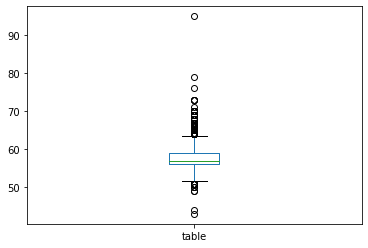

In [40]:
data['table'].plot(kind="box")
plt.show()

In [41]:
data['table'].describe()

count    53935.000000
mean        57.456930
std          2.234393
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [42]:
q1=data['table'].quantile(0.25)
q2=data['table'].quantile(0.50)
q3=data['table'].quantile(0.75)

In [43]:
IQR = q3-q1
IQR

3.0

In [44]:
low_lim=q1-(1.5*IQR)
upp_lim=q3+(1.5*IQR)

In [45]:
low_lim

51.5

In [46]:
upp_lim

63.5

In [47]:
data[(data['table']<low_lim)].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

In [48]:
data[(data['table']>upp_lim)].index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=589)

In [49]:
#drop the values less than lower limit and greater than upper limit of column 'table'

In [50]:
data.drop([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
           25179, 26387, 33586, 35633, 45798, 46040, 47630],inplace=True)

In [51]:
data.drop(data[data['table']>upp_lim].index,inplace=True)

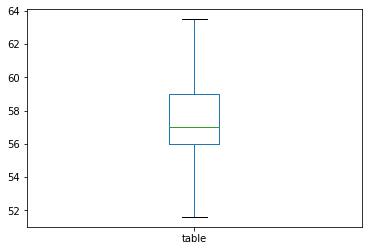

In [52]:
data['table'].plot(kind="box")
plt.show()

In [53]:
#outlier detection using boxplot of column x,y,z

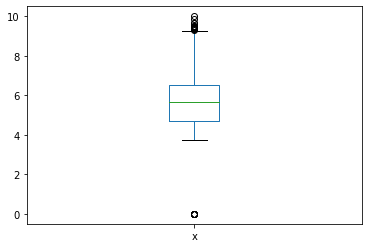

In [54]:
data['x'].plot(kind="box")
plt.show()

In [55]:
data['x'].describe()

count    53330.000000
mean         5.725798
std          1.120566
min          0.000000
25%          4.710000
50%          5.690000
75%          6.540000
max         10.010000
Name: x, dtype: float64

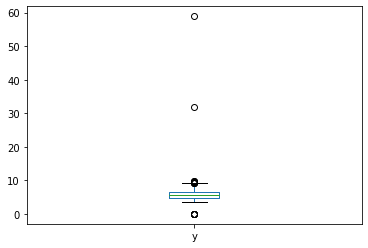

In [56]:
data['y'].plot(kind="box")
plt.show()

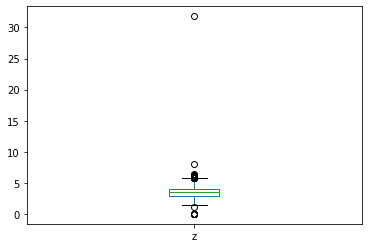

In [57]:
data['z'].plot(kind="box")
plt.show()

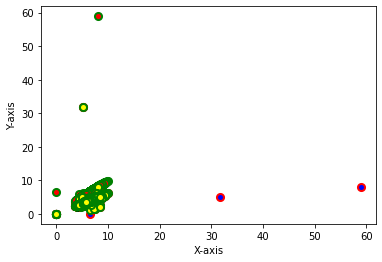

In [58]:
plt.scatter(data['x'],data['y'], c ="red",
            linewidths = 2,
            edgecolor ="green",
            s = 50)
 
plt.scatter(data['y'],data['z'], c ="blue",
            linewidths = 2,
            edgecolor ="red",
            s = 50)

plt.scatter(data['x'],data['z'], c ="yellow",
            linewidths = 2,
            edgecolor ="green",
            s = 50)
 
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [59]:
#remove the values above 30 in x,y,z

In [60]:
data[data['x'] > 30].index

Int64Index([], dtype='int64')

In [61]:
data[data['y'] > 30].index

Int64Index([24067, 49189], dtype='int64')

In [62]:
data.drop([24067, 49189],inplace=True)

In [63]:
data[data['z'] > 30].index

Int64Index([48410], dtype='int64')

In [64]:
data.drop([48410],inplace=True)

# Encoding

In [65]:
data.head(10)

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
5,0.24,Very Good,J,VVS2,57.0,3.94,3.96,2.48,168.0
6,0.24,Very Good,I,VVS1,57.0,3.95,3.98,2.47,168.0
7,0.26,Very Good,H,SI1,55.0,4.07,4.11,2.53,168.5
8,0.22,Fair,E,VS2,61.0,3.87,3.78,2.49,168.5
9,0.23,Very Good,H,VS1,61.0,4.00,4.05,2.39,169.0
10,0.30,Good,J,SI1,55.0,4.25,4.28,2.73,169.5


In [66]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [67]:
dict1={'Ideal':1, 'Premium':2, 'Good':3, 'Very Good':4, 'Fair':5}

In [68]:
data['cut']=data['cut'].map(dict1)

In [69]:
data

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,1,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,2,E,SI1,61.0,3.89,3.84,2.31,163.0
3,0.29,2,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,3,J,SI2,58.0,4.34,4.35,2.75,167.5
5,0.24,4,J,VVS2,57.0,3.94,3.96,2.48,168.0
...,...,...,...,...,...,...,...,...,...
53935,0.72,1,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,3,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,4,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,2,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [70]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

In [71]:
#label encoding for 'clarity'

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
le=LabelEncoder()

In [74]:
data['clarity']=le.fit_transform(data['clarity'])

In [75]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,1,E,3,55.0,3.95,3.98,2.43,163.0
1,0.21,2,E,2,61.0,3.89,3.84,2.31,163.0
3,0.29,2,I,5,58.0,4.20,4.23,2.63,167.0
4,0.31,3,J,3,58.0,4.34,4.35,2.75,167.5
5,0.24,4,J,7,57.0,3.94,3.96,2.48,168.0


In [76]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [77]:
#Onehot encoding for 'color'

In [78]:
data=pd.get_dummies(data)

In [79]:
data.columns

Index(['carat', 'cut', 'clarity', 'table', 'x', 'y', 'z', 'price_new',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J'],
      dtype='object')

In [80]:
data.head()

,carat,cut,clarity,table,x,y,z,price_new,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,1,3,55.0,3.95,3.98,2.43,163.0,0,1,0,0,0,0,0
1,0.21,2,2,61.0,3.89,3.84,2.31,163.0,0,1,0,0,0,0,0
3,0.29,2,5,58.0,4.20,4.23,2.63,167.0,0,0,0,0,0,1,0
4,0.31,3,3,58.0,4.34,4.35,2.75,167.5,0,0,0,0,0,0,1
5,0.24,4,7,57.0,3.94,3.96,2.48,168.0,0,0,0,0,0,0,1


# Scaling

In [81]:
#splitting in traoning and testing set

In [82]:
x=data.drop('price_new',axis=1)

In [83]:
y=data['price_new']

In [84]:
#importing train_test_split

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=123)


In [87]:
#MinMax Scaling

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
scaler = MinMaxScaler()

In [90]:
x_train.loc[:,:] = scaler.fit_transform(x_train)

In [91]:
x_test.loc[:,:] = scaler.transform(x_test)

In [92]:
x_train

,carat,cut,clarity,table,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
44184,0.086455,0.75,0.714286,0.369748,0.507099,0.514781,0.507177,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,0.152738,0.00,0.714286,0.285714,0.590264,0.591233,0.569378,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11074,0.204611,0.75,0.285714,0.369748,0.624746,0.632008,0.618820,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3839,0.201729,1.00,0.428571,0.453782,0.611562,0.609582,0.622010,1.0,0.0,0.0,0.0,0.0,0.0,0.0
35775,0.063401,0.75,0.571429,0.789916,0.497972,0.504587,0.459330,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15604,0.340058,0.00,0.285714,0.369748,0.727181,0.727829,0.704944,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17975,0.244957,0.00,0.571429,0.117647,0.660243,0.667686,0.647528,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28377,0.011527,0.25,1.000000,0.537815,0.413793,0.412844,0.381180,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15956,0.230548,0.75,0.714286,0.873950,0.636917,0.645260,0.631579,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [93]:
x_test

,carat,cut,clarity,table,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
10816,0.244957,0.00,0.428571,0.201681,0.659229,0.666667,0.652313,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13473,0.380403,1.00,0.428571,0.621849,0.729209,0.728848,0.741627,0.0,0.0,0.0,1.0,0.0,0.0,0.0
205,0.167147,0.25,0.285714,0.537815,0.591278,0.591233,0.578947,0.0,0.0,1.0,0.0,0.0,0.0,0.0
39055,0.054755,0.50,1.000000,0.789916,0.497972,0.489297,0.446571,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8093,0.236311,0.75,0.428571,0.453782,0.651116,0.658512,0.642743,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36710,0.060519,0.00,0.142857,0.453782,0.484787,0.490316,0.467305,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45301,0.031700,0.25,0.428571,0.537815,0.442191,0.442406,0.437002,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26178,0.536023,0.25,0.285714,0.537815,0.835700,0.834862,0.799043,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29426,0.051873,0.75,0.285714,0.621849,0.470588,0.476045,0.454545,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [94]:
y_train

44184     784.5
1017     1451.0
11074    2461.0
3839     1736.5
35775     456.0
          ...  
15604    3130.0
17975    3635.0
28377     334.0
15956    3193.0
53338    1327.5
Name: price_new, Length: 39995, dtype: float64

In [95]:
y_test

10816    2433.0
13473    2766.5
205      1388.5
39055     529.0
8093     2170.5
          ...  
36710     476.5
45301     261.5
26178    7758.5
29426     350.0
23983    6070.5
Name: price_new, Length: 13332, dtype: float64

In [96]:
data.describe()

,carat,cut,clarity,table,x,y,z,price_new,color_D,color_E,color_F,color_G,color_H,color_I,color_J
count,53327.000000,53327.000000,53327.000000,53327.000000,53327.000000,53327.000000,53327.000000,53327.000000,53327.000000,53327.000000,53327.000000,53327.000000,53327.000000,53327.000000,53327.000000
mean,0.795953,2.211038,3.839631,57.373241,5.725776,5.728333,3.537121,1964.062698,0.125696,0.181390,0.176683,0.210231,0.153918,0.100306,0.051775
std,0.472403,1.257621,1.725187,2.074217,1.120545,1.112537,0.692865,1995.014976,0.331510,0.385345,0.381404,0.407477,0.360874,0.300410,0.221574
min,0.200000,1.000000,0.000000,51.600000,0.000000,0.000000,0.000000,163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,2.000000,56.000000,4.710000,4.720000,2.910000,472.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,2.000000,4.000000,57.000000,5.690000,5.700000,3.520000,1198.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,4.000000,5.000000,59.000000,6.540000,6.540000,4.040000,2665.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,5.000000,7.000000,63.500000,10.010000,9.940000,6.380000,9411.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
